# Performance Student 

    - Applied Machine Learning for predict performance student 

### Import depedencies

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from functools import partial, reduce
from statistics import mode
from operator import itemgetter, eq

### Read dataset with pandas

In [25]:
with open("StudentsPerformance.csv", "r") as csv: 
    df = pd.read_csv(csv)

In [26]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [27]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Add column 'mean score'

In [28]:
df['mean score'] = np.mean(np.array(df[["math score", "reading score", "writing score"]]), axis=1, dtype=np.int64)

In [29]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,91
7,male,group B,some college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


### Pre-processing data
    - Change values to quantitative values

In [30]:
def to_categorical(df, value):
    categories = list(pd.Categorical(df).categories)
    return categories.index(value) + 1

In [31]:
columns = ["lunch", "race/ethnicity", "gender", "parental level of education", "test preparation course"]
for name in columns:
    df[name] = df[name].apply(partial(to_categorical, df[name]))

In [32]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,1,2,2,2,2,72,72,74,72
1,1,3,5,2,1,69,90,88,82
2,1,2,4,2,2,90,95,93,92
3,2,1,1,1,2,47,57,44,49
4,2,3,5,2,2,76,78,75,76
5,1,2,1,2,2,71,83,78,77
6,1,2,5,2,1,88,95,92,91
7,2,2,5,1,2,40,43,39,40
8,2,4,3,1,1,64,64,67,65
9,1,2,3,1,2,38,60,50,49


### Remove columns 'math score', 'reading score' and 'writing score'

In [33]:
df = df.drop(labels=["math score", "reading score", "writing score"], axis=1)

In [34]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,1,2,2,2,2,72
1,1,3,5,2,1,82
2,1,2,4,2,2,92
3,2,1,1,1,2,49
4,2,3,5,2,2,76
5,1,2,1,2,2,77
6,1,2,5,2,1,91
7,2,2,5,1,2,40
8,2,4,3,1,1,65
9,1,2,3,1,2,49


### Plot heatmap for check correlation of datas

In [35]:
cmap = sns.diverging_palette(260, 10, as_cmap=True) # color to heatmap

In [36]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
mean score                     int64
dtype: object

In [37]:
'''
    Categories: very low, low, medium, high, very high 
'''
df['score class'] = pd.cut(df["mean score"], 3, labels=False)
df.drop('mean score', axis=1, inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score class
0,1,2,2,2,2,2
1,1,3,5,2,1,2
2,1,2,4,2,2,2
3,2,1,1,1,2,1
4,2,3,5,2,2,2


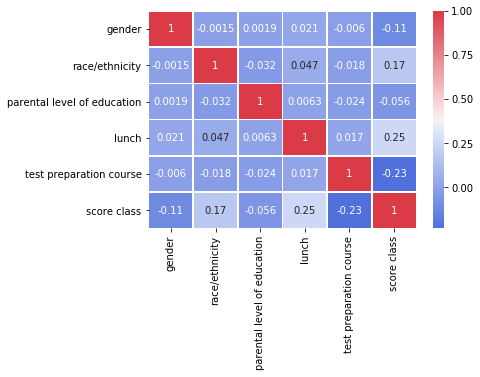

In [38]:
sns.heatmap(df.corr(), cmap=cmap, linewidths=.5, annot=True)

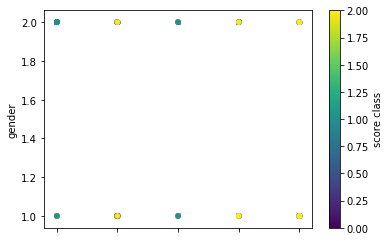

In [39]:
df.plot.scatter(x='race/ethnicity', y='gender', c='score class', colormap='viridis')

### Define functions for calculate distance and predict class 

In [40]:
def distance(inst_1, inst_2, dist_type='euclidean'):
    distances = {
        'euclidean': lambda x1, x2: ((x1 - x2) ** 2) ** 0.5, 
    }
    dist_result = sum(map(distances[dist_type], inst_1, inst_2))
    return dist_result

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('score class', axis=1).values,
    df['score class'].values)

In [42]:
def check_neighbours(k, distances):
    distances_copy = distances.copy()
    distances_copy.sort()
    return [*map(distances.index, distances_copy[: k])]

In [43]:
def predict(X_train, Y_train, X_test):
    distances = [*map(lambda X_t: [*map(partial(distance, X_t), X_train)], X_test)]
    
    classes_inds = [*map(partial(check_neighbours, 3), distances)]
    return [*map(lambda inst_classes: mode([*map(lambda ind: Y_train[ind], inst_classes)]), classes_inds)]

In [49]:
def score(predictions, Y_test):
    return sum([*map(eq, predictions, Y_test)]) / len(Y_test)

### Calculate score of classification with KNN

In [44]:
predictions = predict(X_train, Y_train, X_test)

In [46]:
score(predictions, Y_test)

0.548

#### The same result because the dataset is same 

In [52]:
for i in range(5):
    predictions = predict(X_train, Y_train, X_test)
    print(score(predictions, Y_test))


0.548
0.548
0.548
0.548
0.548
